In [13]:
# Import the required libraries for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
- Load the data using the Pandas read function.
- print the dataset information
- Print the stastics about the data using describe function
- Visualize the correlation map to understand the correlation with the columns.
- Check for null values, and if the data contains any, remove them. 
- Additionally, inspect for duplicate values and remove them if present.

In [14]:
# Load the data set and print the top 5 rows
data=pd.read_csv('salary.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# about the data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
# Under standing  stastics in the data set
data.describe().style.background_gradient(cmap='tab20c')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


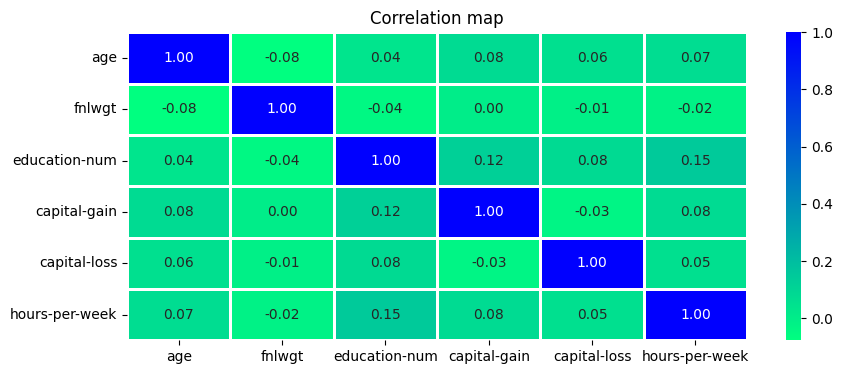

In [19]:
# Checking the correlation matirx
# Strip leading/trailing spaces from string columns
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

plt.figure(figsize=(10,4))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='winter_r', fmt='.2f', linewidths=1)

plt.title("Correlation map")
plt.show()

# Data Cleaning Process

In [20]:
# Checking the null values in the data set
data.isna().sum()/len(data)*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [22]:
#Checking the Percentage of the null values in the dataset
null_values=data.isna().sum()
total_shells= data.size
total_missing_values=null_values.sum()
percentage_missing_values=(total_missing_values/total_shells)*100
print(f'The data set contains {percentage_missing_values} of values')

The data set contains 0.0 of values


In [23]:
# Checking the duplicate values in the dataset
duplicate=data.duplicated().sum()
print(f'There is {duplicate} values in the data set we remove it')

There is 24 values in the data set we remove it


In [24]:
# Remove the duplicate values and store the data set as data variable
data=data.drop_duplicates()
after_remove_duplicates=data.duplicated().sum()
print(f'There is {after_remove_duplicates} values in the data set ')

There is 0 values in the data set 


# Explore Data Analysis Process

# Question asked from the data:
- We use a for loop to print count plots for numerical columns to understand the most repeated values.
- We also visualize a histogram for the number of hours employees work.
- Additionally, we visualize the output percentages using a pie chart.
- Furthermore, we perform data cleaning by replacing unwanted names in the dataset with "Others".
- We create a pie chart to understand the distribution of output in numerical columns.
- We generate a separate dataset for the USA to analyze the most demanded education and jobs.
- We explore the education levels with the most hours worked in the USA.
- Using a for loop, we visualize selected numerical columns in the USA dataset using bar charts.
- Additionally, we utilize box plots with the dataset and hue values based on salary using a for loop.
- Furthermore, we create a pivot table for better data understanding.
- Lastly, we visualize the most demanded jobs with work hours ranging from less than 20 hours to 40 hours.







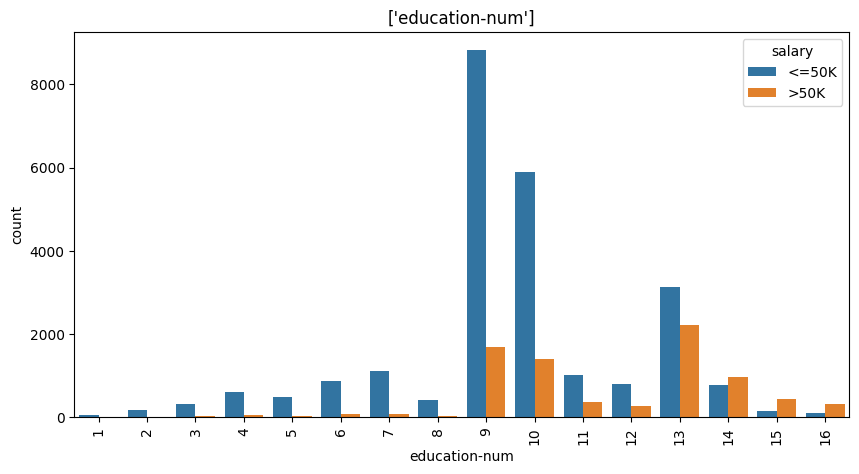

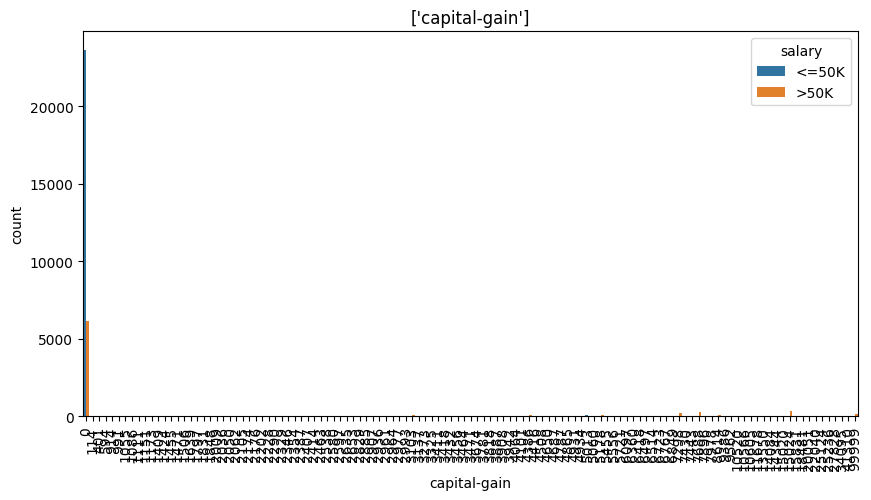

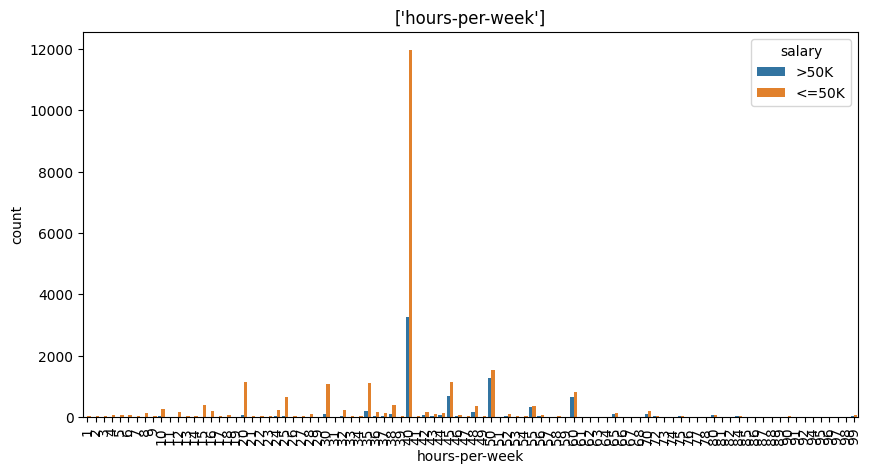

In [25]:
# create a count plot to visualize the some numerical columns in the data
numerical=['education-num','capital-gain','hours-per-week']
for i in numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data,x=i,hue='salary')
    plt.title([i])
    plt.xticks(rotation=90)
    plt.show()

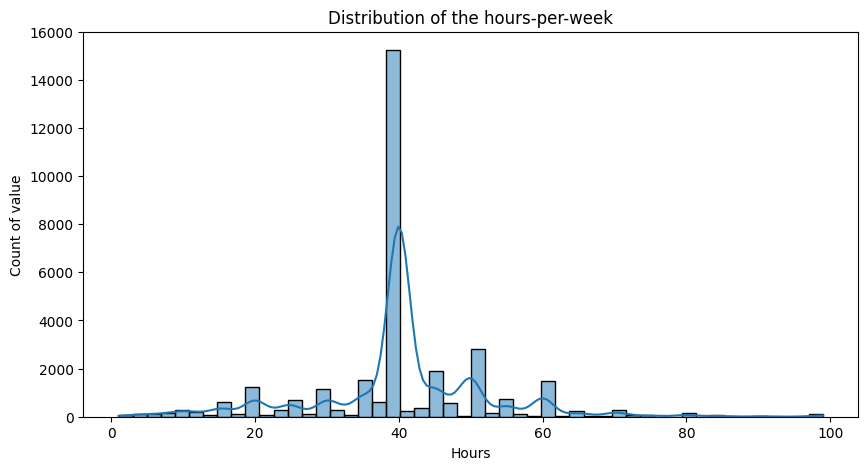

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='hours-per-week',bins=50,kde=True)
plt.title("Distribution of the hours-per-week")
plt.xlabel("Hours")
plt.ylabel("Count of value")
plt.show()

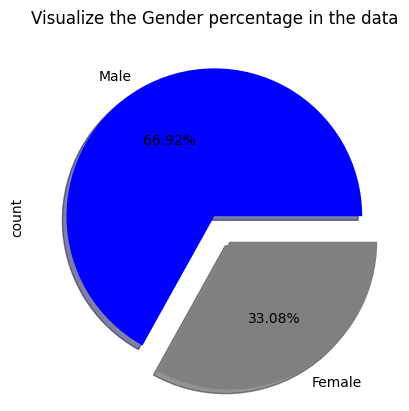

In [27]:
# Let's find the percentage of the gender in the data set using the pie chat
data['sex'].value_counts().plot(kind='pie',
    explode=[0,0.2],
    labels=['Male','Female'],
    colors=['blue','gray'],
    autopct='%1.2f%%',
    shadow=True,
        )
plt.title("Visualize the Gender percentage in the data")
plt.show()

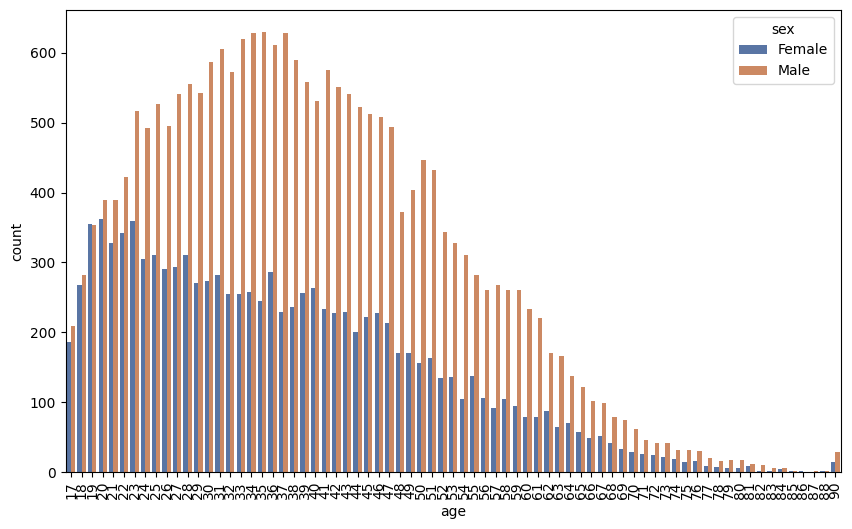

In [28]:
# Distibution of the age column with the gender
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='age',hue='sex',palette='deep')
plt.xticks(rotation=90)
plt.show()

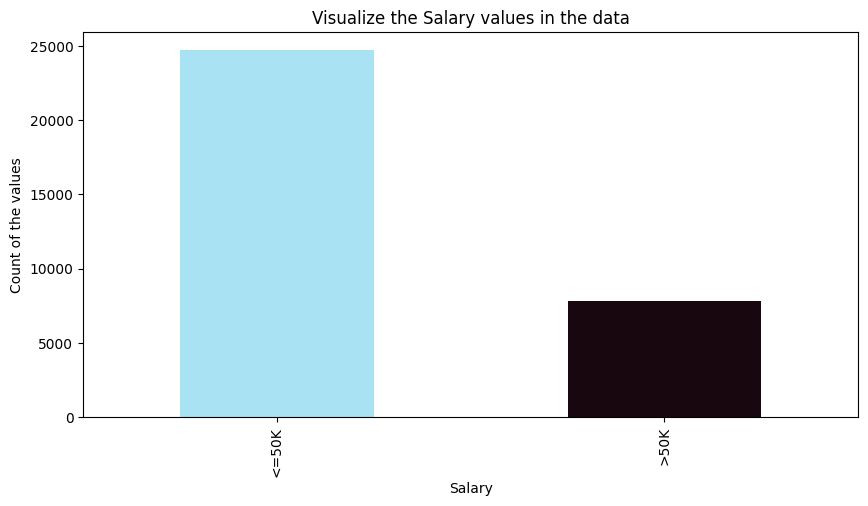

In [29]:
plt.figure(figsize=(10,5))
data['salary'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                               color=['#A9E2F3','#190710'])
plt.title("Visualize the Salary values in the data")
plt.xlabel("Salary")
plt.ylabel("Count of the values")
plt.show()

In [30]:
# The data contains the unwanted informatin we would like to remove and add new values on the particuler columns
data['native-country'].value_counts().head(3)

native-country
United-States    29153
Mexico             639
?                  582
Name: count, dtype: int64

In [31]:
data['native-country']=data['native-country'].str.replace('?','others')
data['workclass']=data['workclass'].str.replace('?','others')
data['occupation']=data['occupation'].str.replace('?','others')

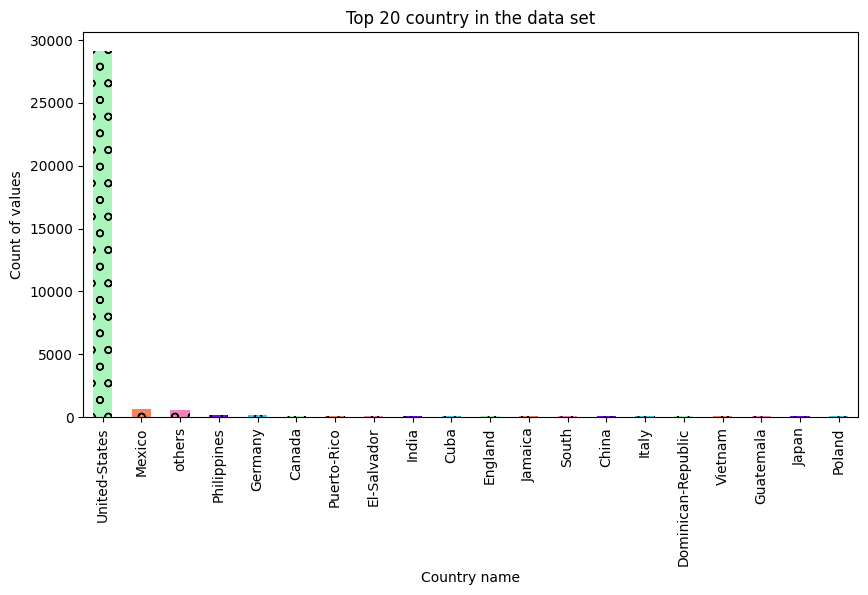

In [32]:
# Visualize the top 20 countrys in the dataset
data['native-country'].value_counts().nlargest(20)\
.plot(kind='bar',title="Top 20 country in the data set",hatch='o',figsize=(10,5),color=['#A9F5BC','#FA8258','#F781BE','#8000FF','#2ECCFA'])
plt.xlabel("Country name")
plt.ylabel("Count of values")
plt.show()

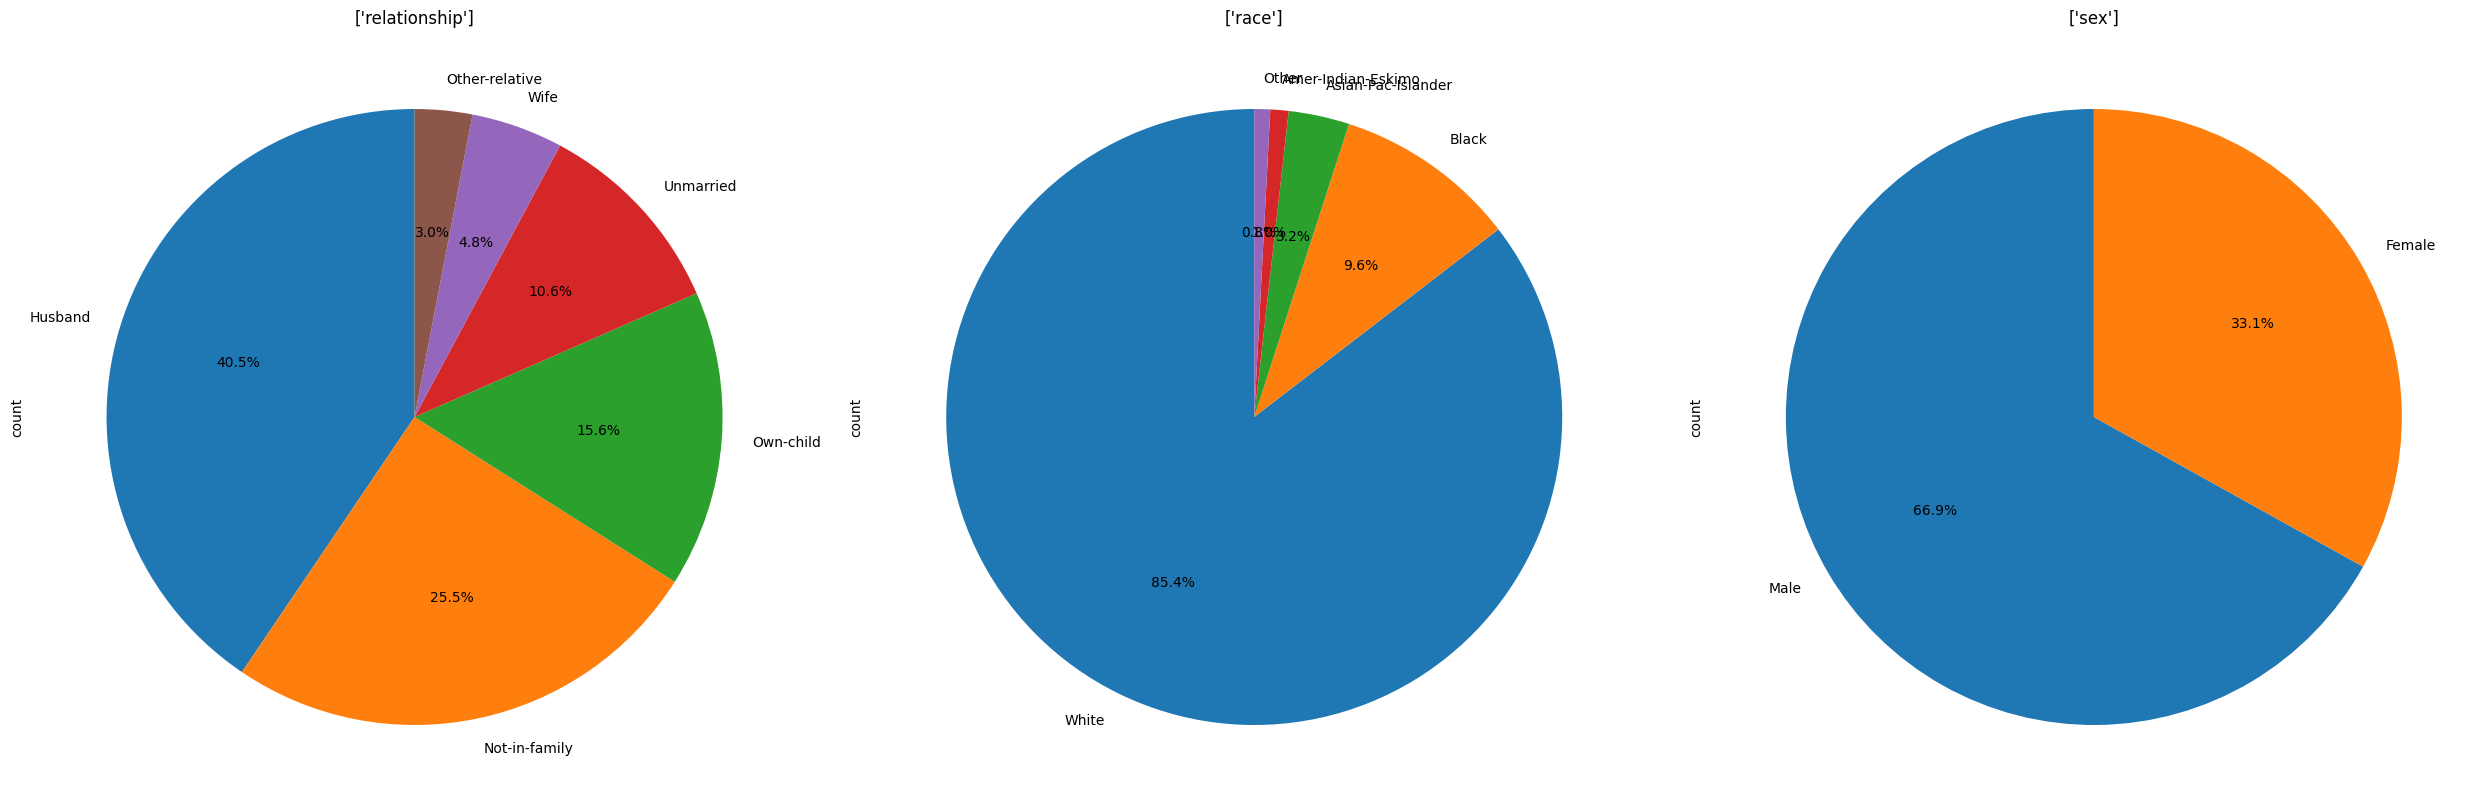

In [33]:
# Create a pie chart to understande the relationships, race,sex percentage with output columns
another_list=['relationship','race','sex']
num_of_columns=len(another_list)
plt.figure(figsize=(25,8))
for i, col in enumerate(another_list):
    plt.subplot(1,num_of_columns,i+1)
    data[col].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
    plt.title([col])
plt.tight_layout()
plt.show()

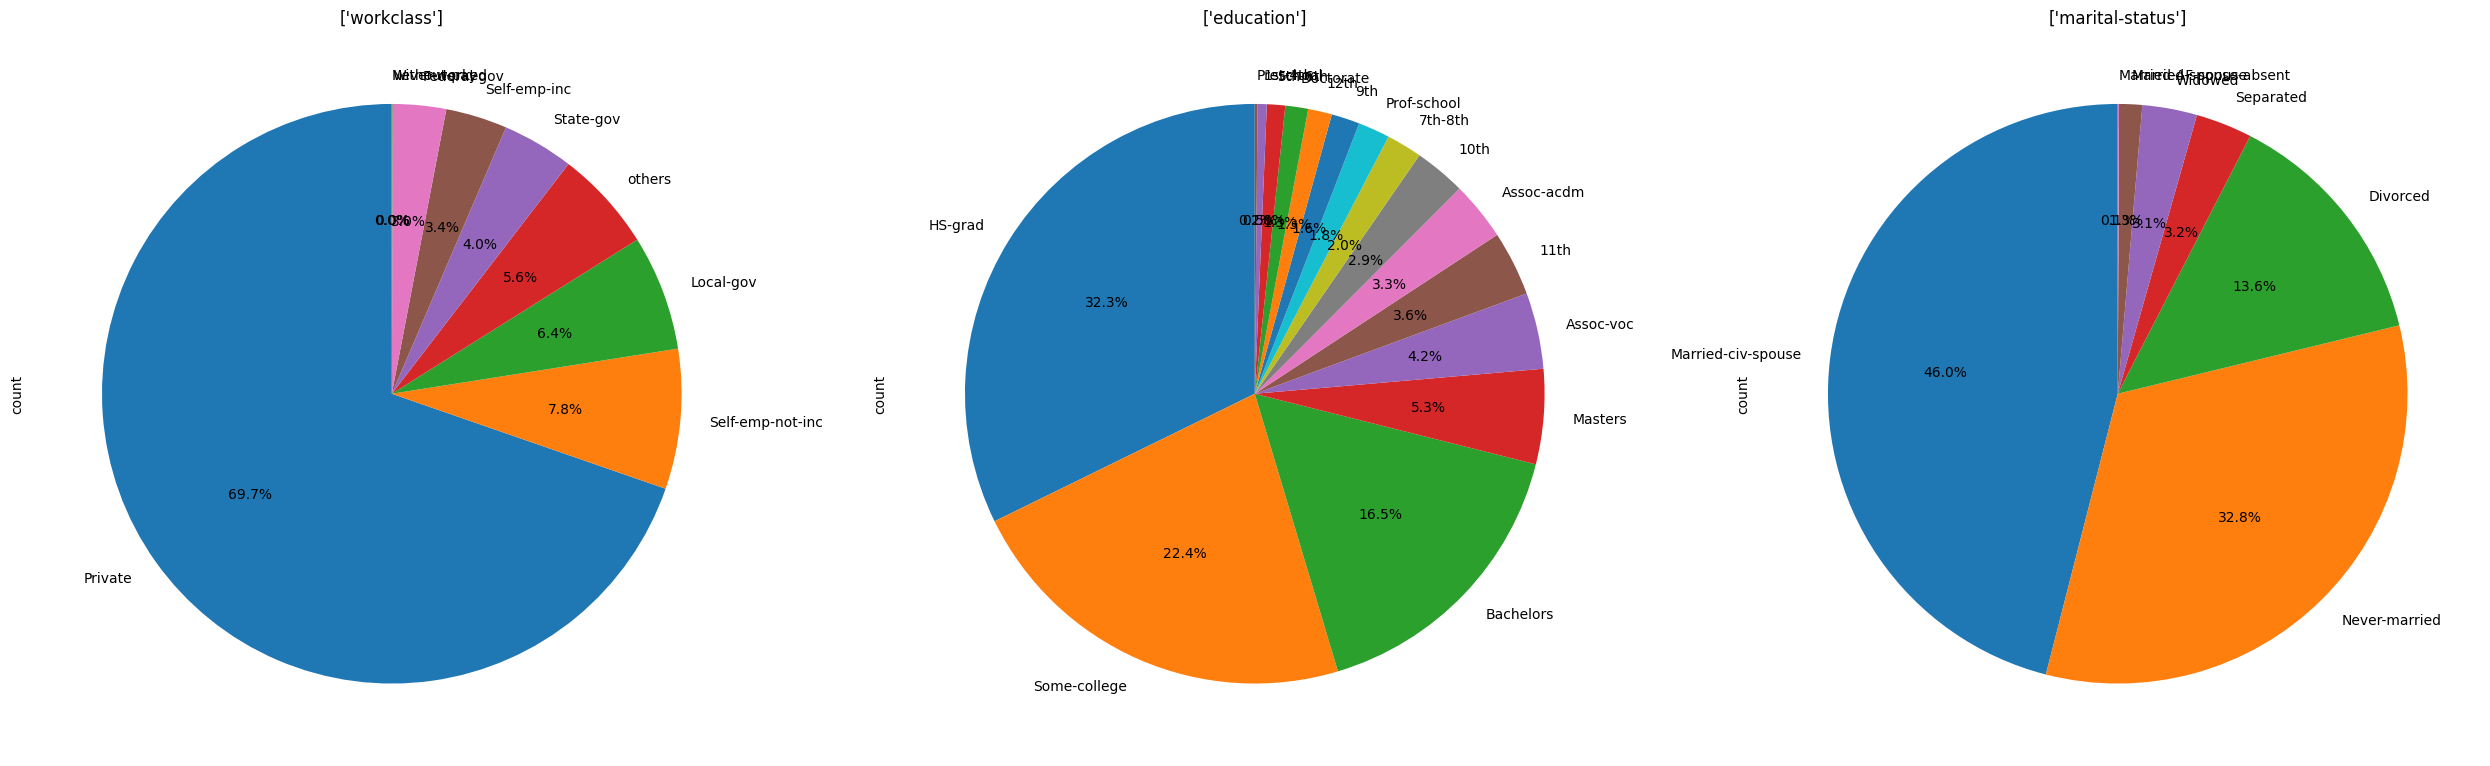

In [34]:
# Create a pie chart to understand the percentage of the workclass and education and marital-status with output columsn
work_place=['workclass','education','marital-status']
num_column=len(work_place)
plt.figure(figsize=(25,8))
for i,col in enumerate(work_place):
    plt.subplot(1,num_column,i+1)
    data[col].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
    plt.title([col])
plt.tight_layout()
plt.show()

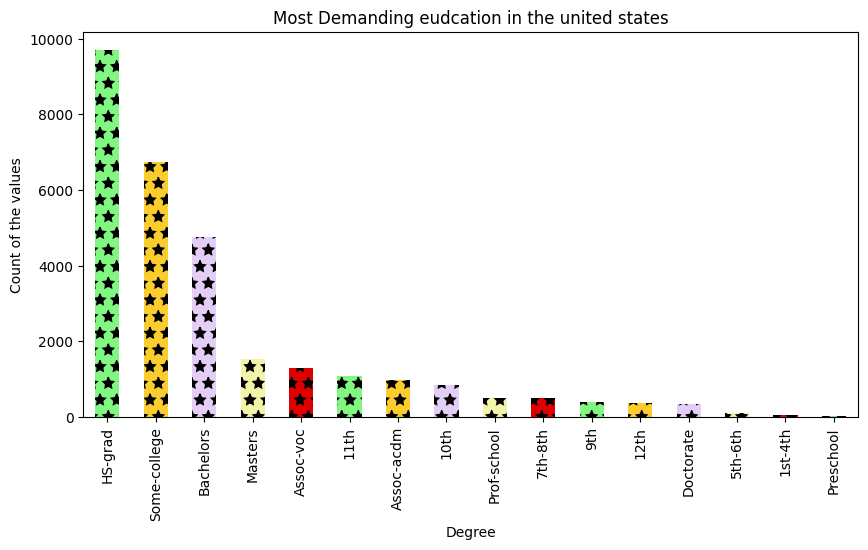

In [38]:
# Apply the different condition to the data to creat a seperate data frame for united states and less then 40 hours per week
# Strip whitespace from object (string) columns
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

usa=data[data['native-country']=='United-States']
# Find the which education is most demanding in the unitedstates
usa['education'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),hatch='*',color=['#81F781','#FACC2E','#E3CEF6','#F2F5A9','#DF0101'])
plt.title("Most Demanding eudcation in the united states")
plt.xlabel("Degree")
plt.ylabel("Count of the values")
plt.show()

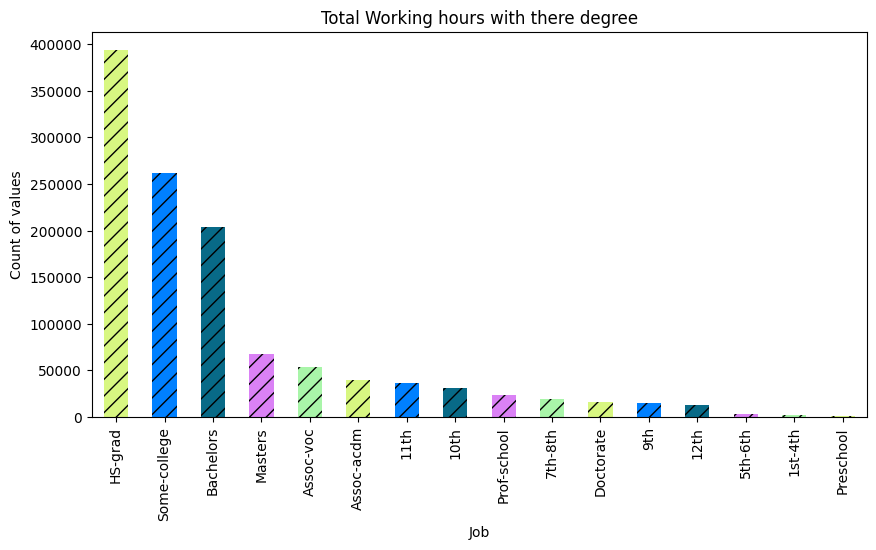

In [39]:
# Find the total working hours with there education using the bar chart
usa.groupby('education')['hours-per-week'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),hatch='//',color=['#D8F781','#0080FF','#086A87','#DA81F5','#A9F5A9'])
plt.title("Total Working hours with there degree")
plt.xlabel("Job")
plt.ylabel("Count of values")
plt.show()

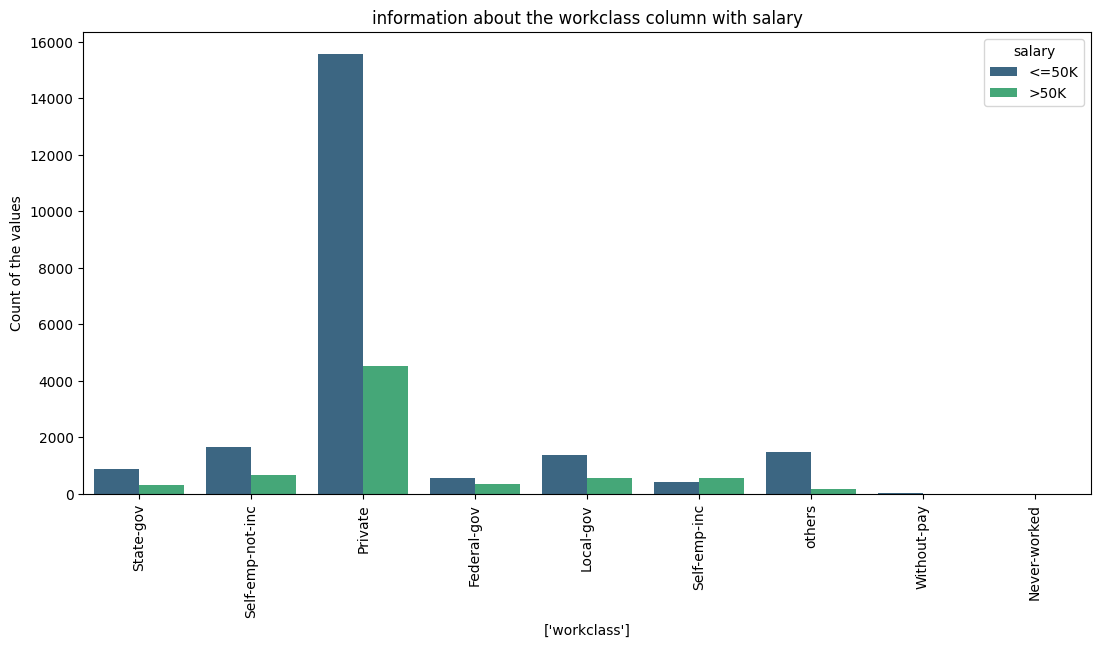

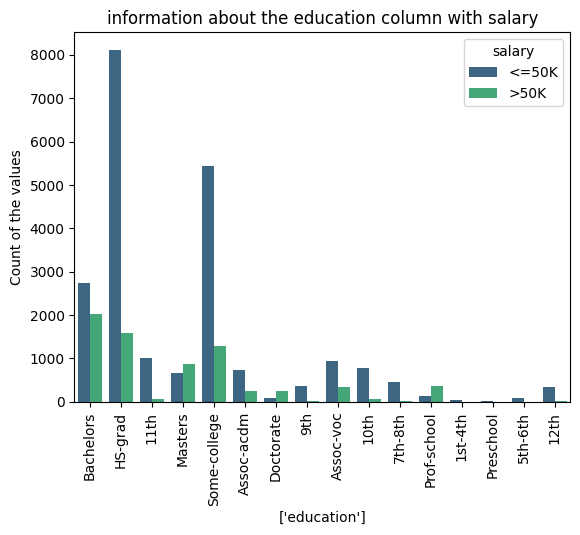

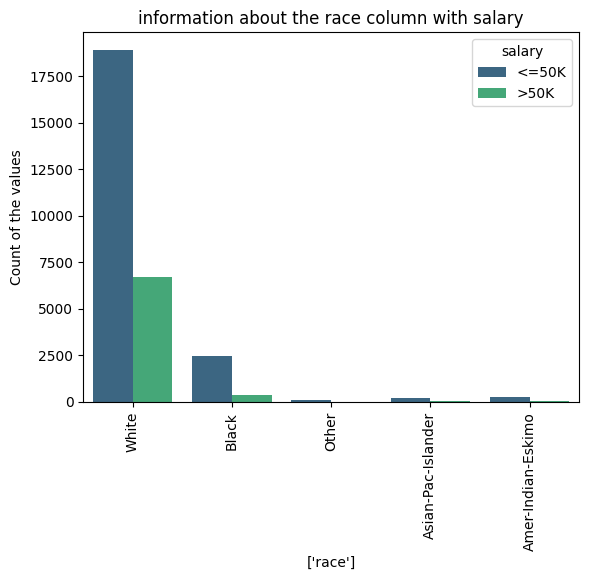

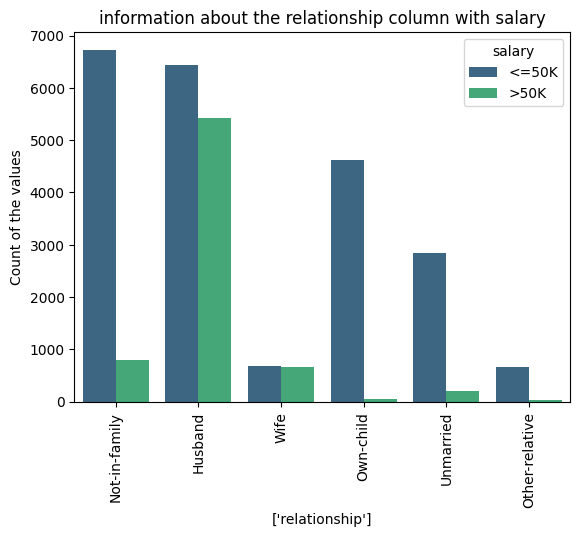

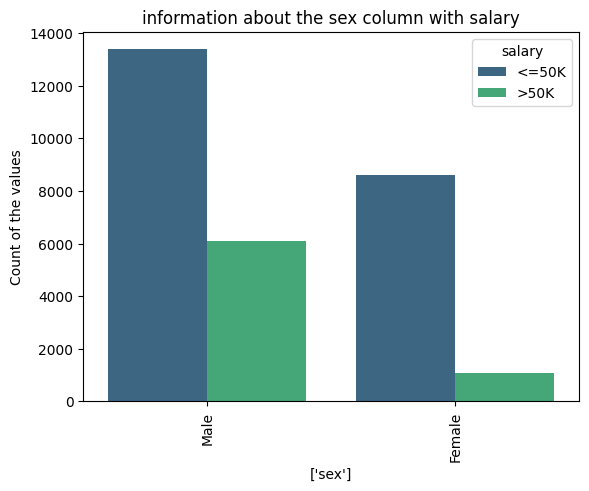

In [40]:
#Create a countplot to understanding the informaiton about the united states
plt.figure(figsize=(13,6))
for i in ['workclass','education','race','relationship','sex']:
    sns.countplot(data=usa,x=i,hue='salary',palette='viridis')
    plt.title(f'information about the {i} column with salary')
    plt.xlabel([i])
    plt.ylabel("Count of the values")
    plt.xticks(rotation=90)
    plt.show()

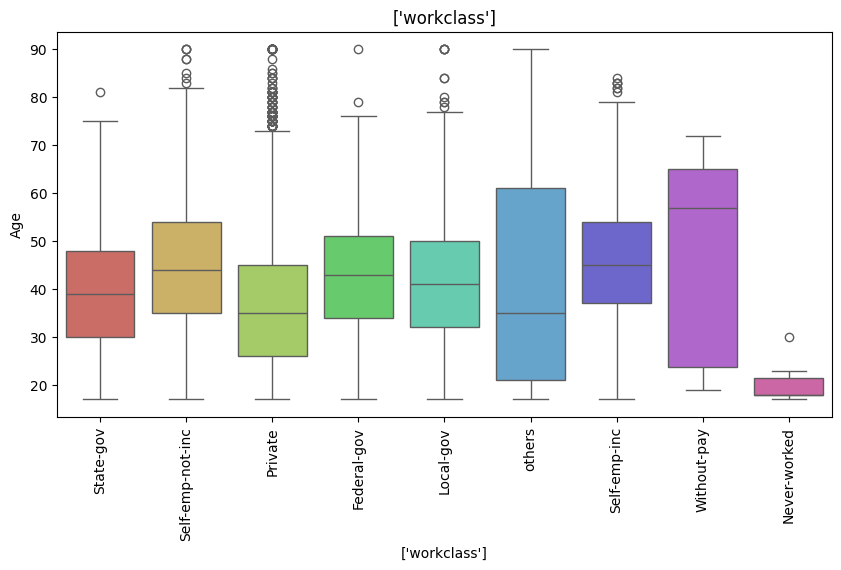

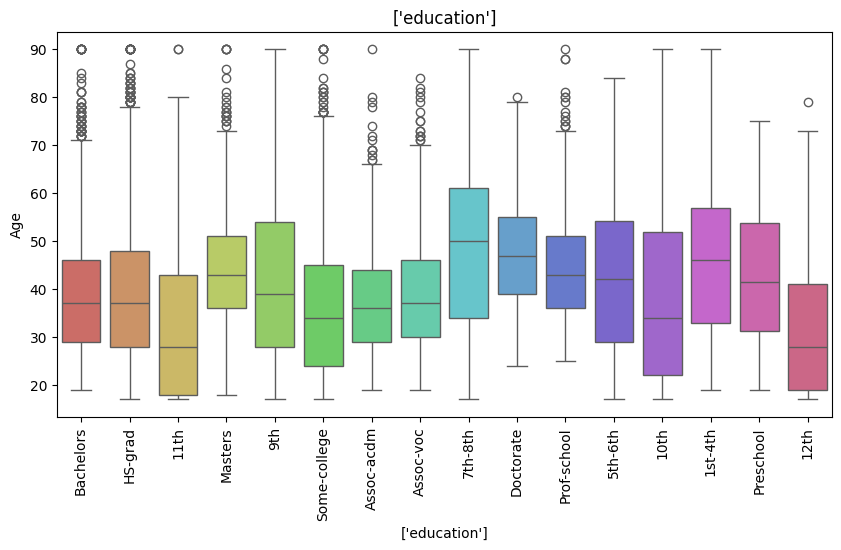

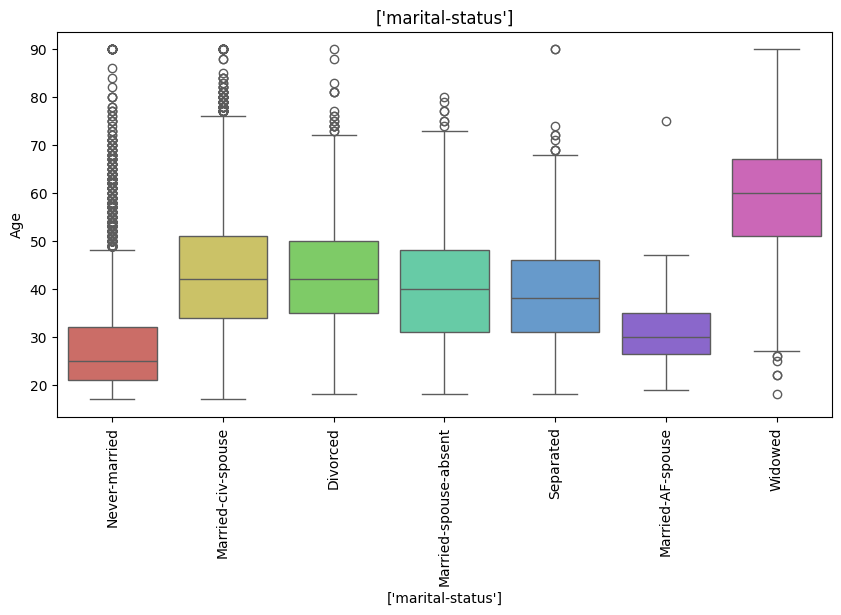

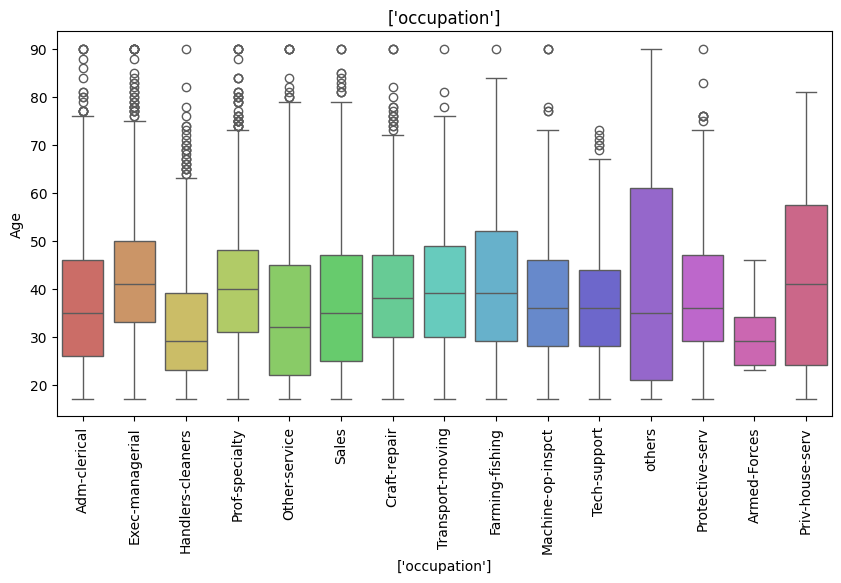

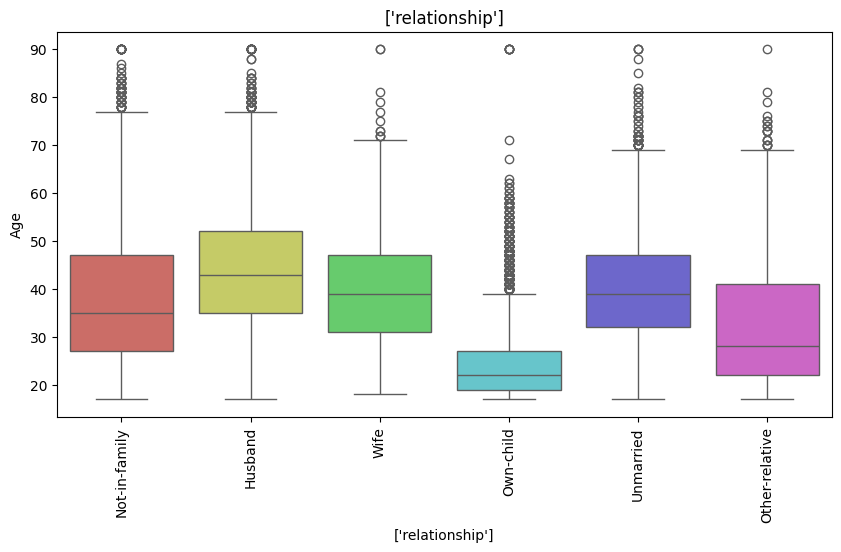

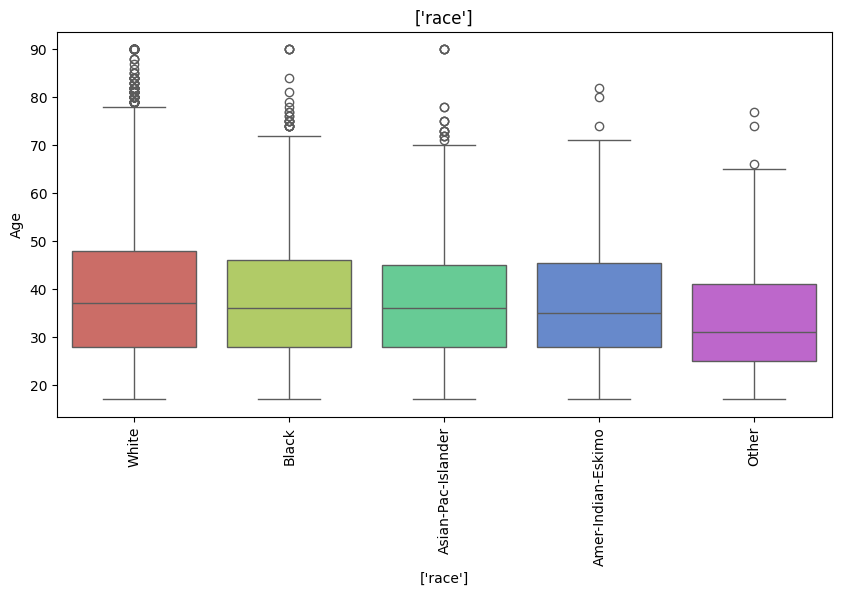

In [41]:
# Create a boxplot for numerical column with age
for i in ['workclass','education','marital-status','occupation','relationship','race']:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data,x=data[i],y='age',palette='hls')
    plt.title([i])
    plt.xlabel([i])
    plt.xticks(rotation=90)
    plt.ylabel('Age')
    plt.show()

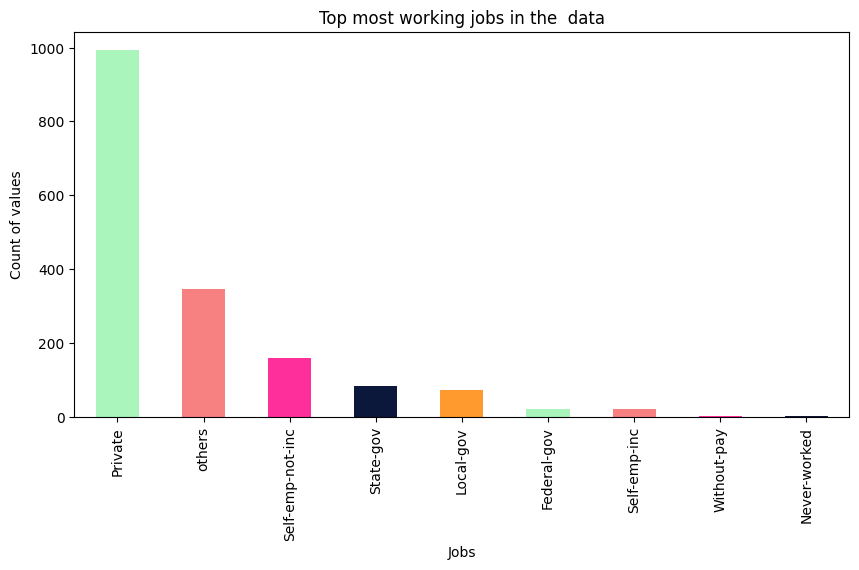

In [42]:
# Find the job between the range 20 to 40 hours with workclass
filterd_jobs=data[(data['hours-per-week']<20) & (data['hours-per-week']<=40)]
filterd_jobs['workclass'].value_counts().plot(kind='bar',figsize=(10,5),color=['#A9F5BC','#F78181','#FE2E9A','#0B173B','#FE9A2E'])
plt.title("Top most working jobs in the  data")
plt.xlabel("Jobs")
plt.ylabel("Count of values")
plt.show()

In [43]:
# using groupby condition find the some intresting facts
data.groupby('education')['salary'].value_counts()\
.unstack().style.background_gradient(cmap='gist_heat_r')

salary,<=50K,>50K
education,,
10th,871.000000,62.000000
11th,1115.000000,60.000000
12th,400.000000,33.000000
1st-4th,160.000000,6.000000
5th-6th,316.000000,16.000000
7th-8th,605.000000,40.000000
9th,487.000000,27.000000
Assoc-acdm,802.000000,265.000000
Assoc-voc,1021.000000,361.000000


In [44]:
# Create a pivot table
pivot_table=data.pivot_table(columns='workclass',index='education',values='hours-per-week',aggfunc='sum')
pivot_table.style.background_gradient(cmap='cividis_r')

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,others
education,,,,,,,,,
10th,253.000000,1185.000000,70.000000,25595.000000,729.000000,2915.000000,508.000000,nan,3315.000000
11th,247.000000,1100.000000,10.000000,31318.000000,550.000000,2429.000000,467.000000,nan,3742.000000
12th,175.000000,696.000000,nan,11702.000000,298.000000,851.000000,390.000000,nan,1381.000000
1st-4th,nan,132.000000,nan,5218.000000,80.000000,478.000000,20.000000,nan,419.000000
5th-6th,40.000000,311.000000,nan,10449.000000,170.000000,686.000000,125.000000,nan,1117.000000
7th-8th,70.000000,1023.000000,35.000000,16882.000000,640.000000,4031.000000,318.000000,50.000000,2342.000000
9th,120.000000,853.000000,nan,14806.000000,469.000000,1417.000000,238.000000,nan,1652.000000
Assoc-acdm,2257.000000,3556.000000,nan,29795.000000,1677.000000,3139.000000,1511.000000,50.000000,1233.000000
Assoc-voc,1570.000000,3582.000000,nan,41432.000000,1898.000000,5067.000000,1890.000000,nan,2067.000000


In [45]:
# Some intresting questions asked from the data
print('The most demanding education is',data['education'].value_counts().idxmax())
print('\n the least demanding  education is',data['education'].value_counts().idxmin())
print('\n The highest working hours in the data is',data['hours-per-week'].value_counts().idxmax())
print('\n The less working hours in the data is',data['hours-per-week'].value_counts().idxmin())
print('\n Most dominate race is',data['race'].value_counts().idxmax())
print('\n Less dominate race is ',data['race'].value_counts().idxmin())
print('\n Most dominate occupation is',data['occupation'].value_counts().idxmax())
print('\n Less dominate race is',data['occupation'].value_counts().idxmin())

The most demanding education is HS-grad

 the least demanding  education is Preschool

 The highest working hours in the data is 40

 The less working hours in the data is 87

 Most dominate race is White

 Less dominate race is  Other

 Most dominate occupation is Prof-specialty

 Less dominate race is Armed-Forces


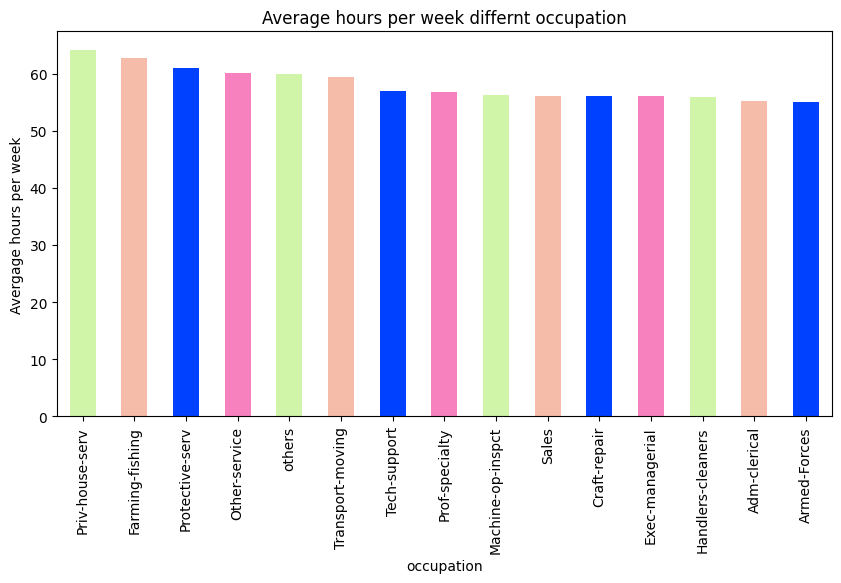

In [46]:
# Find the average working hours with occupation where more then 50 hours
long_hours_jobs=data[(data['hours-per-week']>=50)]
long_hours_jobs.groupby('occupation')['hours-per-week'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['#D0F5A9','#F5BCA9','#0040FF','#F781BE'])
plt.title("Average hours per week differnt occupation")
plt.xlabel("occupation")
plt.ylabel("Avergage hours per week")
plt.show()

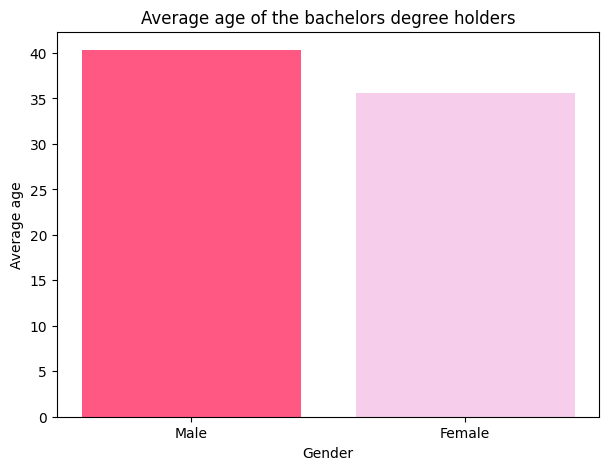

In [50]:
# Find the average age of the bachelors degree holder
# Strip whitespace from string columns (if not already done)
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Now filter properly
bachelors = data[data['education'] == 'Bachelors']

# Group by sex and get average age
find_the_average_age = bachelors.groupby('sex')['age'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(7,5))
plt.bar(find_the_average_age.index, find_the_average_age.values, color=['#FF5882','#F6CEEC'])
plt.title("Average age of the bachelors degree holders")
plt.xlabel('Gender')
plt.ylabel("Average age")
plt.show()


# Observations:
- We observed that the majority of working hours per week fall within the 30 to 40 range.
- The pie chart illustrates a higher percentage of males in the dataset.
- The USA has the highest number of records in the dataset.
- A significant portion of employees earned a salary of less than 50k.
- Within the USA data, the most demanded degree is high school (hs-degree), which also corresponds to the highest working hours.
- The pie chart provides insights into various aspects of the output.
- Employees in the "private house service" sector work for more than 50 hours per week.
- Working hours for employees in private companies typically range between 20 to 40 hours.


# Machine Learning Modeling

In [52]:
# Install the all Required libraries for the machine Learning Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [53]:
# Convert the all categories columns into numerical columns using the label encoding
for col in data.select_dtypes(include='object'):
    labelencoder=LabelEncoder()
    labelencoder.fit(data[col].unique())
    data[col]=labelencoder.transform(data[col])

In [54]:
# Split the data into independent and dependent variable
X=data.drop(['salary'],axis=1)
y=data['salary']
# Normalization the data using the Standard Scaler 
standard=StandardScaler()
X=standard.fit_transform(X)
# Split the data into train and test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=220)

In [55]:
# Create a function for machine learning modeling 
def machine_learning_model(model,X_train,X_test,y_train,y_test):
    '''
    In the function we write about the code for machine learning model
    Firstly we fit the train data to the model
    and predict the values with test data and store the values with variable
    and then print the accuracy score along with classification and confusion matrix
    
    '''
    print(f'The {model} ')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_score=accuracy_score(y_test,y_pred)
    print(f'\nThe accuracy score of the {model} is {model_score*100 :.2f}')
    print(f'\n {classification_report(y_test,y_pred)}')
    print(f'\n{confusion_matrix(y_test,y_pred)}')
    matrix=confusion_matrix(y_test,y_pred)
    sns.heatmap(matrix,annot=True,cmap='Reds',fmt='.2f',linewidths=1)
    plt.show()
    print('-'*30)
    
    

In [56]:
models={
    'logistic':LogisticRegression(penalty='l2'),
    'decison':DecisionTreeClassifier(criterion='gini',splitter='best',),
    'Random':RandomForestClassifier(n_estimators=50,criterion='gini'),
    'Knn':KNeighborsClassifier(),
    'xgb':XGBClassifier(),
    'catboost':CatBoostClassifier(iterations=1)
}

The LogisticRegression() 

The accuracy score of the LogisticRegression() is 82.62

               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4941
           1       0.73      0.45      0.55      1567

    accuracy                           0.83      6508
   macro avg       0.78      0.70      0.72      6508
weighted avg       0.82      0.83      0.81      6508


[[4677  264]
 [ 867  700]]


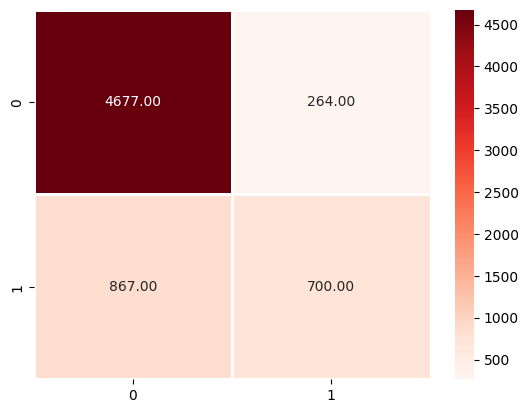

------------------------------
The DecisionTreeClassifier() 

The accuracy score of the DecisionTreeClassifier() is 80.78

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4941
           1       0.60      0.61      0.60      1567

    accuracy                           0.81      6508
   macro avg       0.74      0.74      0.74      6508
weighted avg       0.81      0.81      0.81      6508


[[4301  640]
 [ 611  956]]


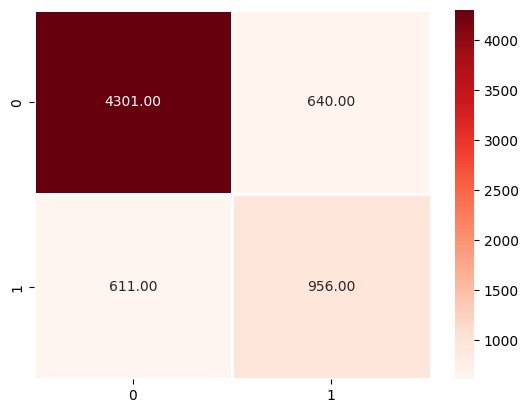

------------------------------
The RandomForestClassifier(n_estimators=50) 

The accuracy score of the RandomForestClassifier(n_estimators=50) is 86.00

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4941
           1       0.75      0.62      0.68      1567

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.85      0.86      0.86      6508


[[4621  320]
 [ 591  976]]


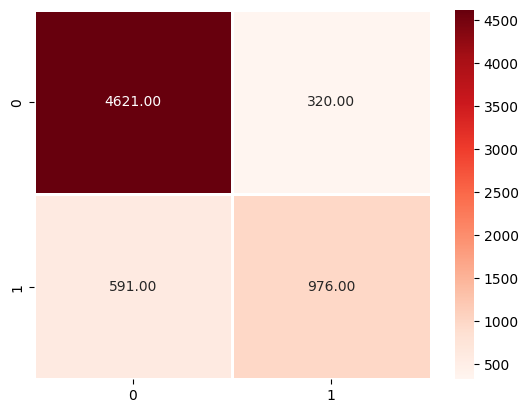

------------------------------
The KNeighborsClassifier() 

The accuracy score of the KNeighborsClassifier() is 83.37

               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4941
           1       0.68      0.58      0.63      1567

    accuracy                           0.83      6508
   macro avg       0.78      0.75      0.76      6508
weighted avg       0.83      0.83      0.83      6508


[[4520  421]
 [ 661  906]]


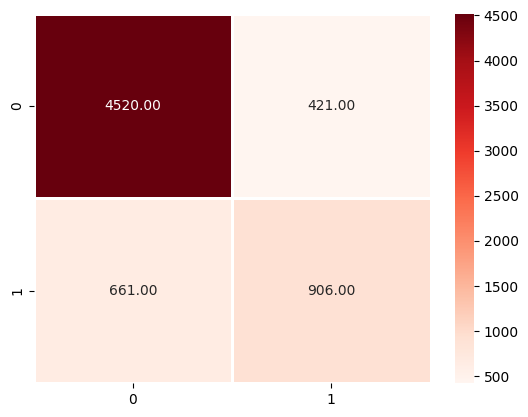

------------------------------
The XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) 

The accuracy score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, earl

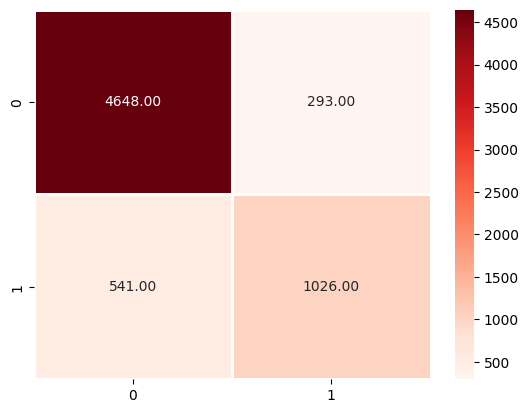

------------------------------
The <catboost.core.CatBoostClassifier object at 0x0000017DB8C6F8C0> 
Learning rate set to 0.5
0:	learn: 0.4868977	total: 154ms	remaining: 0us

The accuracy score of the <catboost.core.CatBoostClassifier object at 0x0000017DB8C6F8C0> is 84.53

               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4941
           1       0.77      0.51      0.61      1567

    accuracy                           0.85      6508
   macro avg       0.82      0.73      0.76      6508
weighted avg       0.84      0.85      0.83      6508


[[4706  235]
 [ 772  795]]


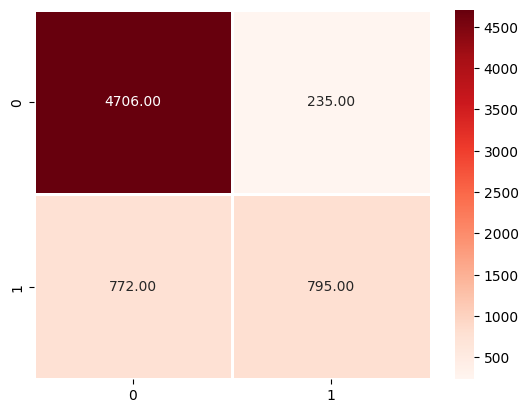

------------------------------


In [57]:
for i in range(len(models)):
    model_names=list(models.values())[i]
    names=list(models.keys())[i]
# And apply the machine learning function to the models
    machine_learning_model(model_names,X_train,X_test,y_train,y_test)

The RandomForestClassifier() 

The accuracy score of the RandomForestClassifier() is 86.11

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4941
           1       0.75      0.63      0.69      1567

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.86      0.86      0.86      6508


[[4615  326]
 [ 578  989]]


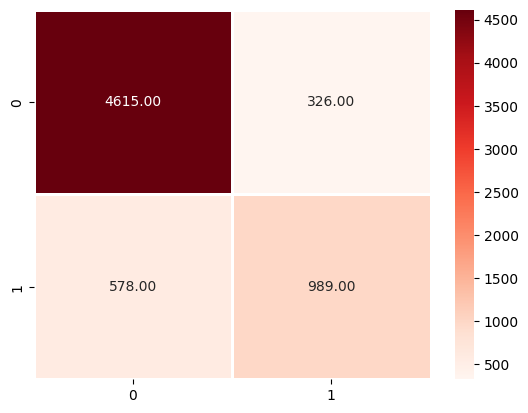

------------------------------


In [58]:
Random=RandomForestClassifier()
machine_learning_model(Random,X_train,X_test,y_train,y_test)

In [59]:
# Let's dump the model
import pickle
# Let's dump the mode
pickle.dump(Random,open('RandomForest.pkl','wb'))